## **1. Import Required Libraries**

### ✅ **1. Data Handling and Analysis**
- **pandas (`pd`)** is used to load, view, and manage data in table format (rows and columns).
- **numpy (`np`)** is used for fast numerical calculations like working with arrays and statistics.

### ✅ **2. Data Visualization**
- **matplotlib.pyplot (`plt`)** is used to draw basic graphs such as bar charts, line graphs, etc.
- **seaborn (`sns`)** is used to make more beautiful and informative statistical plots like heatmaps.

### ✅ **3. Text Processing**
- **re** is used for searching and cleaning text using patterns (e.g., removing digits or special characters).
- **string** helps us work with punctuation, which we often need to remove from text.

### ✅ **4. Feature Extraction from Text**
- **CountVectorizer** converts text data into numbers (called features) so that machine learning models can understand it.

### ✅ **5. Machine Learning Models**
- **MultinomialNB** is a fast model for text classification using probabilities.
- **LogisticRegression** is a model that predicts categories based on input features.
- **LinearSVC** is a fast and accurate model that works well for large text classification tasks.

### ✅ **6. Model Training and Evaluation**
- **train_test_split** is used to divide data into a training set and a testing set.
- **accuracy_score** tells us how many predictions were correct.
- **classification_report** gives more detailed performance results like precision and recall.
- **confusion_matrix** shows a table to compare correct vs wrong predictions.

### ✅ **7. Model Saving and Loading**
- **pickle** is used to save the trained model into a file so we can reuse it later without training again.
Let me know when you're ready to continue with the next part! 😄

In [1]:
# Data handling and analysis
import pandas as pd  # for loading and manipulating tabular data
import numpy as np  # for numerical operations

# Data visualization
import matplotlib.pyplot as plt  # for plotting graphs
import seaborn as sns  # for beautiful statistical plots

# Text processing
import re  # for regular expressions
import string  # for punctuation handling

# Feature extraction from text
from sklearn.feature_extraction.text import CountVectorizer  # for converting text to numeric features

# Machine learning models
from sklearn.naive_bayes import MultinomialNB  # Naive Bayes classifier
from sklearn.linear_model import LogisticRegression  # Logistic Regression
from sklearn.svm import LinearSVC  # Support Vector Machine (linear kernel)

# Utilities for model training and evaluation
from sklearn.model_selection import train_test_split  # for splitting data into train/test sets
from sklearn.metrics import accuracy_score, classification_report, confusion_matrix  # for evaluation

# To save and load the best model
import pickle

## **2. Load Dataset**

### ✅ **Loading the Dataset**
- We load a dataset (from a CSV file) into a table format called a **DataFrame**.
- This file should have two important columns:
  - **Text** – the actual sentence or phrase written in a language.
  - **Language** – the label or name of the language for that text.

This is the **first step** before analyzing or training any machine learning model.

In [2]:
# Load dataset from CSV file. It must contain 'Text' and 'Language' columns
df = pd.read_csv("/kaggle/input/language-detection-dataset/Language Detection.csv")

## **3. Data Preprocessing & Normalization**

### ✅ **Text Cleaning and Normalization**
- A function is created to **clean each sentence** in the dataset.
- **What this cleaning does:**
  - Converts the text to **lowercase** so that "Hello" and "hello" are treated the same.
  - **Removes numbers** because they don’t help in detecting language.
  - **Removes punctuation** like commas, periods, etc., to simplify the text.
  - Gets rid of **extra spaces** between words.
- After defining the function, it is applied to the entire **Text column**, and the cleaned version is saved in a **new column** called `'clean_text'`.

This step helps make the data **uniform and simple**, which is important for accurate model training.

In [3]:
# Clean and normalize the text
def clean_text(text):
    text = text.lower()  # Convert all text to lowercase
    text = re.sub(r'\d+', '', text)  # Remove all digits
    text = text.translate(str.maketrans('', '', string.punctuation))  # Remove punctuation
    text = re.sub(r'\s+', ' ', text).strip()  # Remove extra whitespaces
    return text

# Apply cleaning to the 'Text' column and create a new column 'clean_text'
df['clean_text'] = df['Text'].apply(clean_text)

## **4. Visualization: Language Distribution**

### 📊 **Visualizing Class Distribution (Languages)**
- A **bar chart** is created to show how many samples (texts) are available for **each language** in the dataset.
- It helps us **understand if the dataset is balanced** or if some languages have more data than others.
- The chart is **colorful and readable**, with labels rotated to avoid overlap.
- The final chart is also **saved as an image file** named `"language_distribution.png"`.

This visualization gives a **quick overview** of how much data we have for each language.#

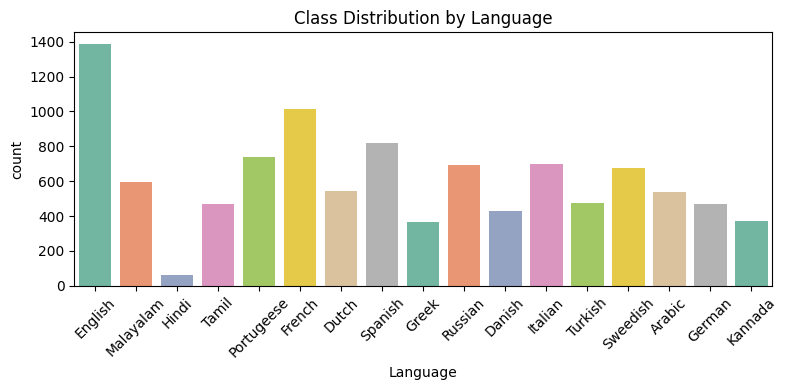

In [4]:
# Plot the number of samples for each language
plt.figure(figsize=(8, 4))
sns.countplot(data=df, x='Language', palette='Set2')
plt.title("Class Distribution by Language")
plt.xticks(rotation=45)
plt.tight_layout()
plt.savefig("language_distribution.png")
plt.show()


## **5. Feature Extraction with Character N-Grams**

### 🔤 **Text to Numeric Features using Character N-grams**
- We use a **CountVectorizer** to turn text into numbers that a machine can understand.
- It looks at **character combinations** (called n-grams) from **2 to 4 characters long**, like:
  - "th", "the", "the ", "he l", etc.
- This helps capture the **style and pattern of each language** better than full words.
- The cleaned text (`clean_text`) is **converted into numeric feature vectors** and stored in `X`.
- The corresponding **labels (languages)** are stored in `y`.

In [5]:
# Use character n-grams (2 to 4 characters) as features
vectorizer = CountVectorizer(analyzer='char', ngram_range=(2, 4))

# Transform the cleaned text into feature vectors
X = vectorizer.fit_transform(df['clean_text'])

# Labels (languages)
y = df['Language']

## **6. Train-Test Split**

### ✂️ **Split Data into Training and Testing Sets**
- We divide the data into two parts:
  - **80% for training** the model (`X_train`, `y_train`)
  - **20% for testing** the model’s performance (`X_test`, `y_test`)
- This helps us train the model on one part and check how well it performs on unseen data.
- The `random_state=42` ensures that we get the **same random split every time** for consistency.

In [6]:
# Split the dataset into training and testing sets (80% train, 20% test)
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

## **7. Train Multiple Models**

There are 3 models as given below:

### 1. **Naive Bayes**  
**Like a quick guesser friend**

This model makes fast decisions by just looking at the words. It doesn’t think too much — just guesses based on keywords.

🧠 **Real-life example:**  
- You get an email with words like “Free”, “Win”, “Lottery”. Naive Bayes says: “This looks like spam!”  
- It works like a person who sees one or two words and quickly guesses the meaning.

✅ **Why it’s good?**  
- Very fast  
- Works well even with small data  
- Great for spam detection

---

### 2. **Logistic Regression**  
**Like yes/no decision maker**

This model gives a simple answer: Yes or No — Positive or Negative.

🧠 **Real-life example:**  
- A review says: “This movie is amazing!” → Model says: “This is positive.”  
- A review says: “Worst movie ever!” → Model says: “This is negative.”

✅ **Why it’s good?**  
- Easy to understand  
- Works great for **sentiment analysis**  
- Good for problems with 2 choices (like Yes/No)

---

### **Explanation of the lines of code**

**1.** A dictionary named `models` is created to **store three machine learning models**: Naive Bayes, Logistic Regression, and SVM.

**2.** An empty dictionary `results` is created to **store the accuracy scores** of each model.

**3.** A `for` loop is used to **train and test each model one by one** using the training (`X_train`, `y_train`) and testing (`X_test`, `y_test`) data.

**4.** `model.fit(...)` is used to **train** each model with the training data.

**5.** `model.predict(...)` is used to **make predictions** on the test data.

**6.** `accuracy_score(...)` calculates **how accurate the model is** (how many correct predictions).

**7.** The accuracy is stored in the `results` dictionary with the model’s name as the key.

**8.** `print(...)` is used to show the model’s name, its accuracy, and a detailed report including **precision, recall, and F1 score**.

**9.** If the current model is **Naive Bayes**, it is saved as a file called `model.pkl` using `pickle`. This file stores the model and vectorizer so it can be used later without retraining.

In [7]:
# Dictionary to store different models
models = {
    "Naive Bayes": MultinomialNB(),
    "Logistic Regression": LogisticRegression(max_iter=1000),
    "SVM (LinearSVC)": LinearSVC()
}

results = {}

# Train each model and evaluate it
for name, model in models.items():
    model.fit(X_train, y_train)  # Train model
    y_pred = model.predict(X_test)  # Predict on test set
    acc = accuracy_score(y_test, y_pred)  # Accuracy
    results[name] = acc  # Store result

    print(f"\n===== {name} =====")
    print(f"Accuracy: {acc*100:.2f}%")
    
    print(classification_report(y_test, y_pred))  # Precision, recall, f1


===== Naive Bayes =====
Accuracy: 98.50%
              precision    recall  f1-score   support

      Arabic       1.00      0.99      1.00       106
      Danish       0.97      0.93      0.95        73
       Dutch       1.00      0.96      0.98       111
     English       0.95      1.00      0.97       291
      French       0.99      0.99      0.99       219
      German       1.00      0.98      0.99        93
       Greek       1.00      0.99      0.99        68
       Hindi       1.00      1.00      1.00        10
     Italian       0.99      0.98      0.98       145
     Kannada       1.00      1.00      1.00        66
   Malayalam       1.00      0.99      1.00       121
  Portugeese       0.98      0.98      0.98       144
     Russian       1.00      1.00      1.00       136
     Spanish       1.00      0.99      0.99       160
    Sweedish       0.96      0.97      0.96       133
       Tamil       1.00      1.00      1.00        87
     Turkish       1.00      0.99      

In [8]:
    # Save the best model (you can modify this logic if needed)
    if name == "Naive Bayes":
        with open("model.pkl", "wb") as f:
            pickle.dump((model, vectorizer), f)

## **8. Visualization: Model Accuracy Comparison**

### 📊 **What this part of the code does:**

**1.** It creates a **bar chart** to show the accuracy of each model.  
**2.** Each bar shows how well a model performed — higher bar means better accuracy.  
**3.** It uses **Seaborn** and **Matplotlib** libraries to make the chart look nice and clean.

---

### ✅ **Why this is useful?**

- Helps you **compare all models visually**
- Easy to see which model is the **best**
- You can **save** this chart in your report or presentation

/usr/local/lib/python3.11/dist-packages/seaborn/_oldcore.py:1765: FutureWarning: unique with argument that is not not a Series, Index, ExtensionArray, or np.ndarray is deprecated and will raise in a future version.
  order = pd.unique(vector)


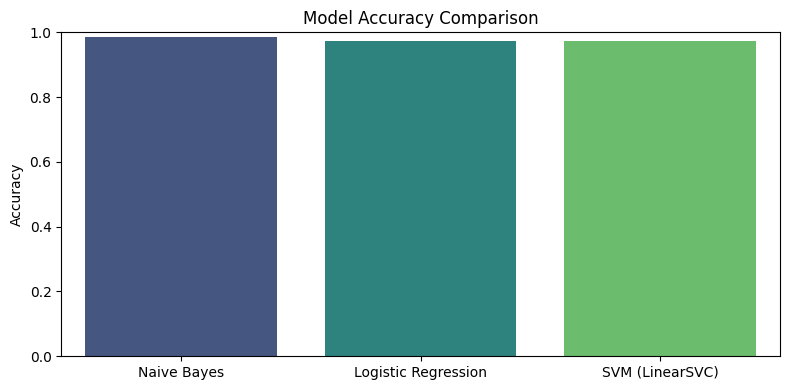

In [9]:
# Visualization: Model Accuracy Comparison

plt.figure(figsize=(8, 4))
sns.barplot(x=list(results.keys()), y=list(results.values()), palette="viridis")
plt.title("Model Accuracy Comparison")
plt.ylabel("Accuracy")
plt.ylim(0, 1)
plt.tight_layout()
plt.savefig("model_accuracy_comparison.png")
plt.show()

## **9. Confusion Matrix for Best Model (Naive Bayes)**

### 📊 **Confusion Matrix in Language Detection**  

#### Step-by-Step with Real-Life Example:

---

### **1. Training the Model:**  
You train your **language detection model** using sentences in different languages (e.g., English, Arabic, French).

🧑‍🏫 **Real-life example:**  
Let’s say we give the model a lot of example sentences, like:
- "I love programming." (English)
- "أحب البرمجة." (Arabic)
- "J'adore la programmation." (French)

These are like the "training materials" for the model to learn from, so it can figure out what language a sentence belongs to.

---

### **2. Model Makes Predictions:**  
Now, the model is trained, and you test it by giving it new sentences. The model will try to **predict** the language of the sentence.

🧑‍🏫 **Real-life example:**  
Let’s say you give the model the sentence:  
- "Programming is fun."  
The model guesses: **English**.

Or, for a sentence like:  
- "البرمجة ممتعة"  
The model guesses: **Arabic**.

---

### **3. Creating the Confusion Matrix:**  
Now, the **confusion matrix** will compare the actual language (the correct label) to what the model predicted.

For example, let's say your dataset has 3 languages: **English**, **Arabic**, and **French**. The confusion matrix shows:
- How many sentences in **English** were correctly predicted as **English** (True Positive).
- How many sentences in **English** were incorrectly predicted as **Arabic** or **French** (False Positive/Negative).

### Confusion matrix might look something like this:

|                  | Predicted: English | Predicted: Arabic | Predicted: French |
|------------------|--------------------|-------------------|-------------------|
| **Actual: English** | 50 (True Positives) | 5 (False Negatives) | 2 (False Negatives) |
| **Actual: Arabic** | 3 (False Positives)  | 45 (True Positives) | 1 (False Negatives) |
| **Actual: French** | 4 (False Positives)  | 2 (False Positives) | 48 (True Positives) |

---

### **4. Visualizing the Confusion Matrix (Heatmap):**

After creating the confusion matrix, we can **plot it** as a **heatmap**. A heatmap uses colors to show how well the model is doing. 

🧑‍🏫 **Real-life example:**  
- Darker colors represent **correct predictions** (the model guessed correctly).
- Lighter colors show **incorrect predictions** (the model made a mistake).

---

### ✅ **Why is this useful in Language Detection?**

- **Helps identify where the model is making mistakes:**  
  If the model often confuses **English** with **French**, the confusion matrix will show a lot of errors in that area.  
  **Example:** 4 sentences in English are mistakenly classified as French.

- **Shows how well the model is distinguishing between languages:**  
  If the matrix shows most predictions as correct (True Positives), the model is working well.  
  **Example:** 50 English sentences are predicted correctly as English.

- **Visualizes language-specific problems:**  
  Maybe the model struggles more with **Arabic** sentences because they have a different writing style (right to left) or different characters.

---

### 🧠 **Conclusion:**

- **Confusion matrix** helps you see the **accuracy** and **mistakes** of your **language detection model**.
- It gives you insights on which languages the model is good at detecting and where it makes errors.

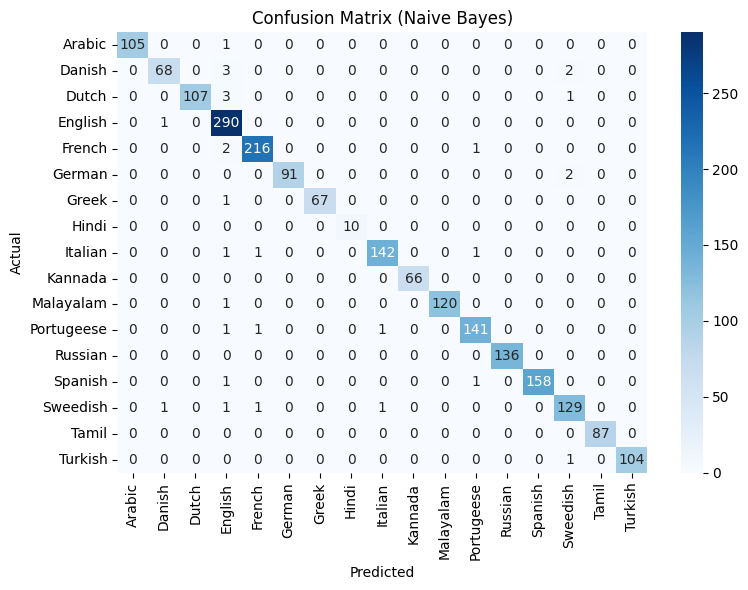

In [10]:
# Re-train Naive Bayes to visualize confusion matrix
nb_model = MultinomialNB()
nb_model.fit(X_train, y_train)
y_pred_nb = nb_model.predict(X_test)

# Create a confusion matrix
cm = confusion_matrix(y_test, y_pred_nb, labels=nb_model.classes_)

# Plot the confusion matrix as a heatmap
plt.figure(figsize=(8, 6))
sns.heatmap(cm, annot=True, fmt='d', xticklabels=nb_model.classes_, yticklabels=nb_model.classes_, cmap='Blues')
plt.title("Confusion Matrix (Naive Bayes)")
plt.xlabel("Predicted")
plt.ylabel("Actual")
plt.tight_layout()
plt.savefig("confusion_matrix.png")
plt.show()


## ✅ **Conclusion**

   - After completing the language detection project, it highlights how language detection can be efficiently handled using machine learning models like Naive Bayes, Logistic Regression, and SVM. It can be applied to tasks such as **automated content moderation**, **translation systems**, and **social media analysis**, where understanding the language of the content is important for further processing.

In this project, we successfully developed a **Language Detection System** using **character-level n-gram analysis** and trained it with multiple machine learning models including **Naive Bayes**, **Logistic Regression**, and **Support Vector Machines (SVM)**.